In [13]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from src.models import SensingModel, HumanModel, ScheduleModel
from datetime import datetime as dt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from src.libs import Calender
from src.libs import TNMAnalyzer

### Data Set

In [34]:
cal = Calender(9, "직원 1")
cal.datas

,employee_name,event,start_time,end_time,score
0,직원 1,지각,2022-09-05 09:00:00,2022-09-05 09:10:00,2
1,직원 1,지각,2022-09-06 09:00:00,2022-09-06 09:05:00,2
2,직원 1,자리 이탈,2022-09-06 13:00:00,2022-09-06 13:30:00,6
3,직원 1,자리 이탈,2022-09-08 17:15:00,2022-09-08 17:55:00,8
4,직원 1,자리 이탈,2022-09-14 14:00:00,2022-09-14 14:10:00,2
5,직원 1,자리 이탈,2022-09-15 15:00:00,2022-09-15 16:00:00,15
6,직원 1,지각,2022-09-20 09:00:00,2022-09-20 09:30:00,6
7,직원 1,자리 이탈,2022-09-23 16:45:00,2022-09-23 17:45:00,15
8,직원 1,자리 이탈,2022-09-26 13:00:00,2022-09-26 13:20:00,4


### 모든 직원에 대하여 TNM Model 도출 및 병합

In [33]:
tnm = TNMAnalyzer(9)

tnm.get_tnm_model()

,employee_name,Time,Number,Magnitude,TNM Value
0,직원 1,26,8,60,94
1,직원 2,30,1,2,33
2,직원 3,14,4,70,88


### TNM Model 정규화 & 정규화 TNM Model

In [23]:
tnm.get_score_table()

,Time,Number,Magnitude,score
1점(우수),14.0,1.0,2.0,1
2점(미달),19.3,3.3,24.7,2
3점(매우미달),24.7,5.7,47.3,3


### TNM Segmentation

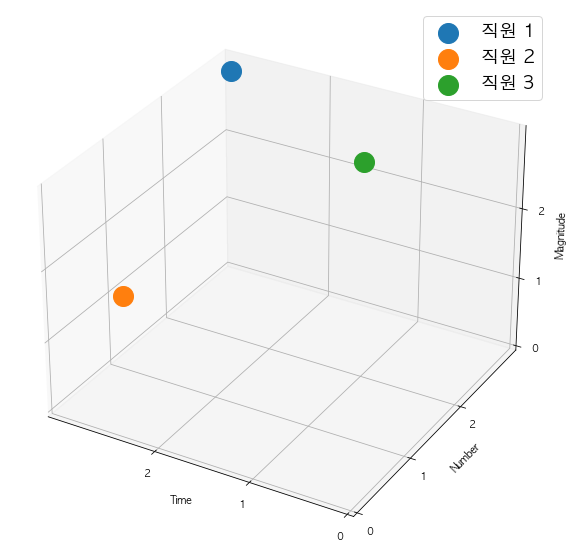

In [25]:
tnm.draw()

### 다음달 업무평가 (개선점수 구하기) - 상대평가에 의한 문제

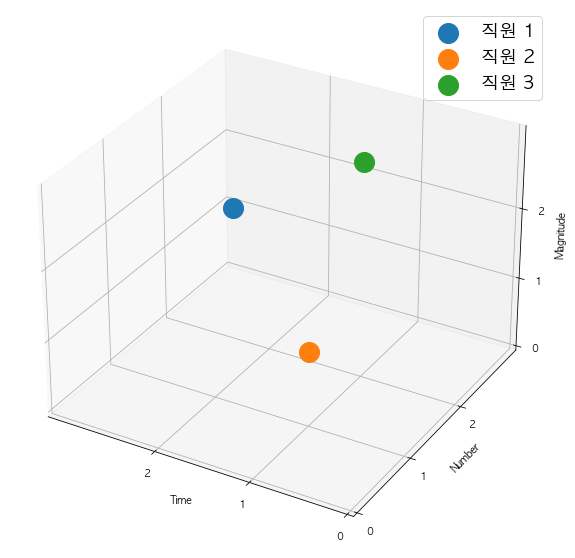

In [26]:
# 10월 데이터 준비
tnm_10 = TNMAnalyzer(10)
tnm_10.draw()

### 개선점수를 위한 데이터 병합

In [27]:
tnm_10.get_merge_tnm_model()

,Time,Number,Magnitude,TNM Value
직원 1_9월,26,8,60,94
직원 2_9월,30,1,2,33
직원 3_9월,14,4,70,88
직원 1_10월,11,2,4,17
직원 2_10월,0,0,0,0
직원 3_10월,3,1,15,19


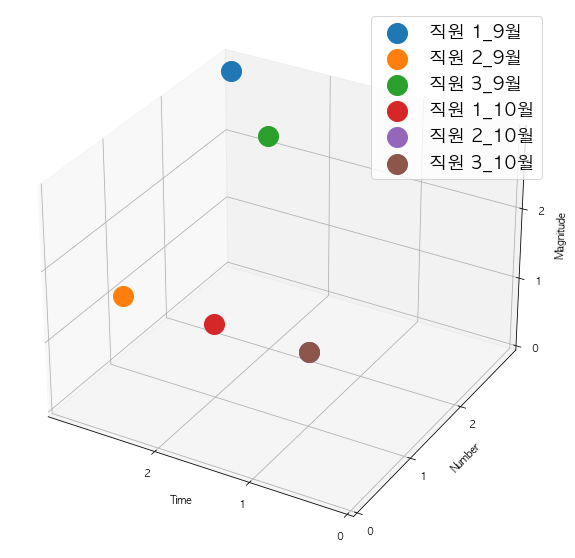

In [28]:
tnm_10.draw_merge()

In [29]:
tnm_10.get_result()

,employee_name,Time,Number,Magnitude,TNM Value,개선점수
0,직원 1,11,2,4,17,58.3
1,직원 2,0,0,0,0,30.1
2,직원 3,3,1,15,19,56.2


### 가중치의 의미

In [32]:
tnm.get_tnm_model(weights=[0.5,1,2])

,employee_name,Time,Number,Magnitude,TNM Value
0,직원 1,13.0,8,120,141.0
1,직원 2,15.0,1,4,20.0
2,직원 3,7.0,4,140,151.0
